In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

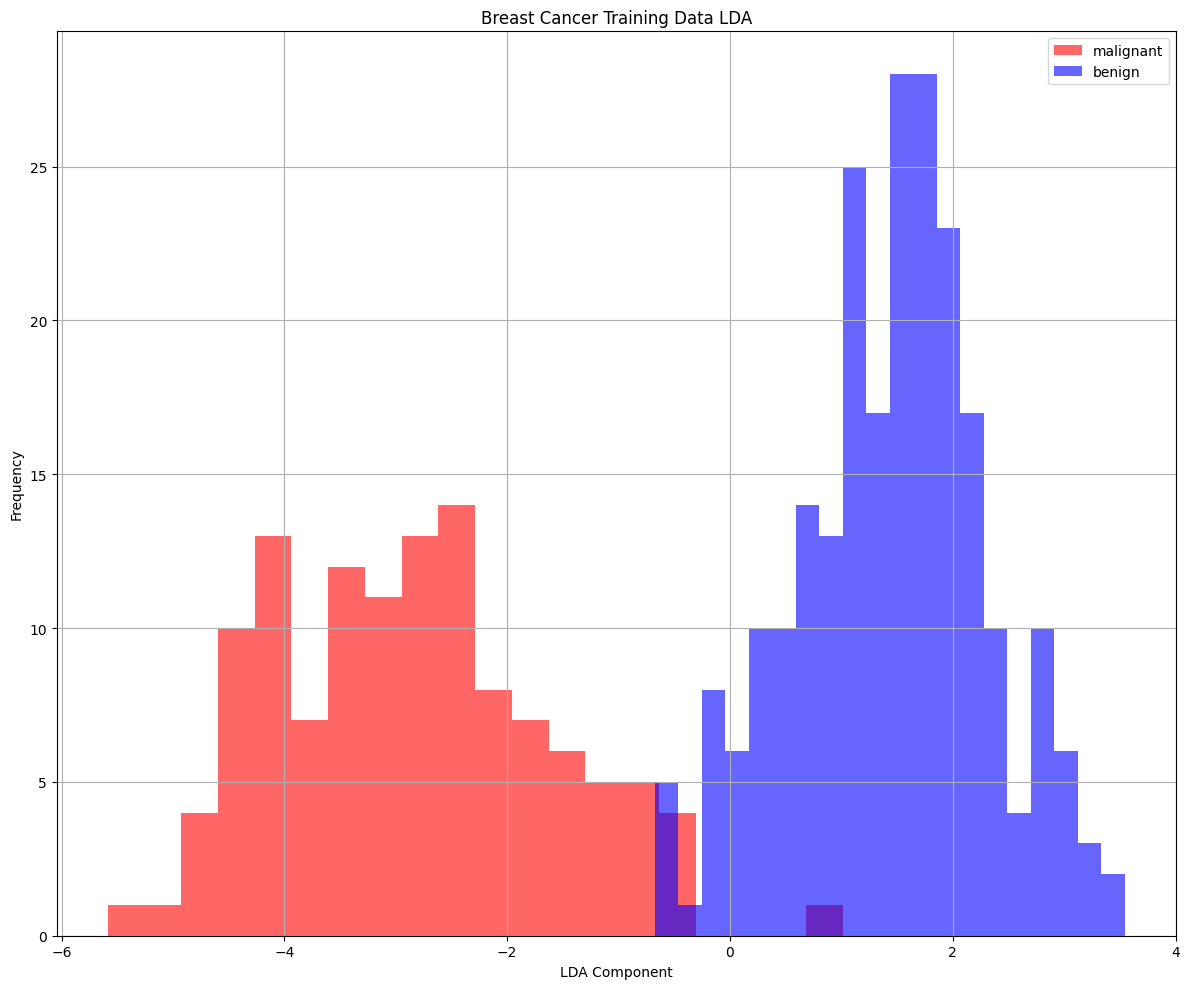

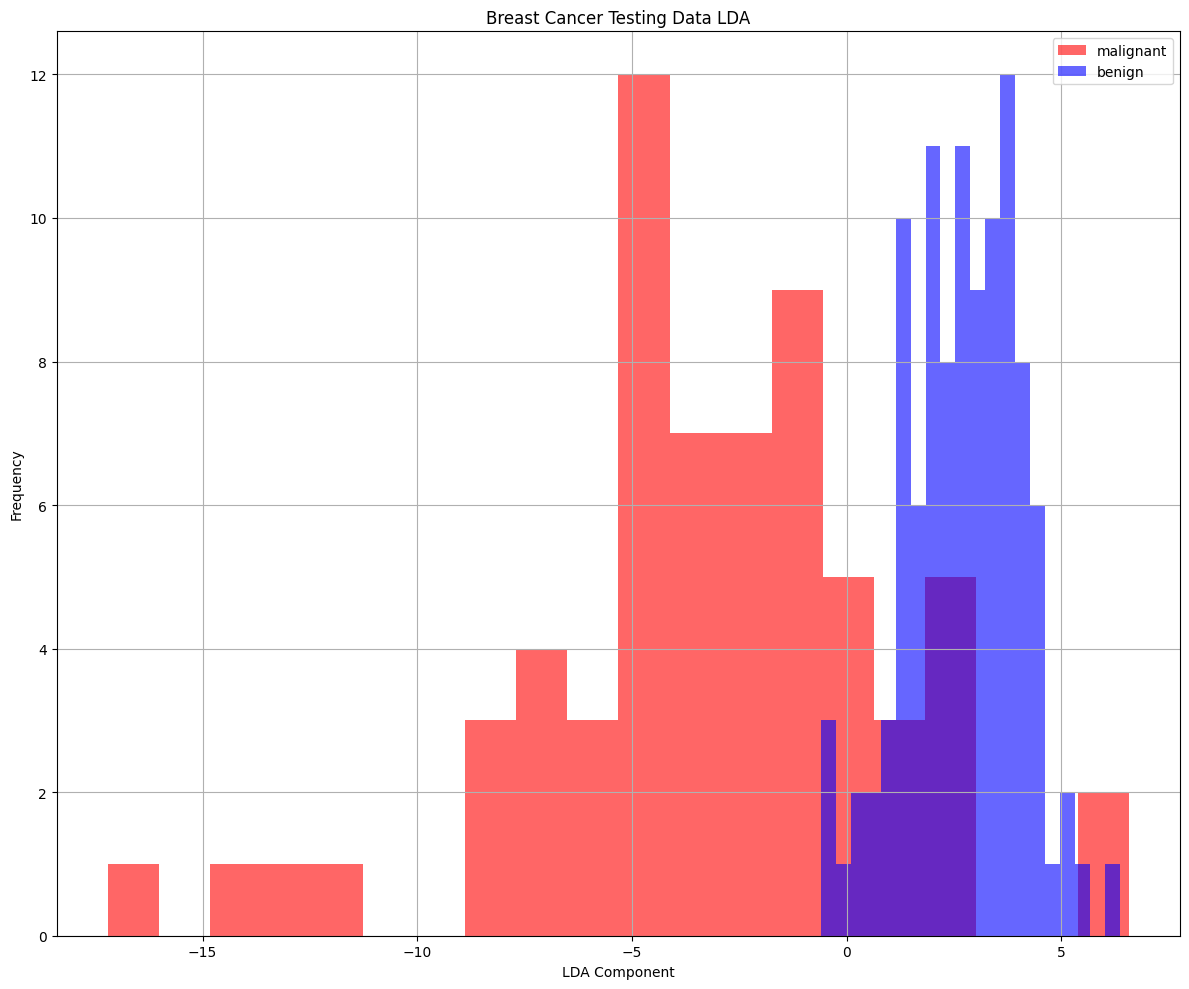

[I 2025-04-27 06:23:15,866] A new study created in memory with name: no-name-39515a98-bafc-4f37-9b11-522a1b64be41
[I 2025-04-27 06:24:46,740] Trial 0 finished with value: 0.9724124809741248 and parameters: {'n_estimators': 4371, 'learning_rate': 0.0029061618028078766, 'num_leaves': 28, 'max_depth': 12, 'min_child_samples': 85, 'subsample': 0.8706851895781837, 'colsample_bytree': 0.8382131374453549, 'reg_alpha': 0.0608988918149708, 'reg_lambda': 0.000269551879825628}. Best is trial 0 with value: 0.9724124809741248.
[I 2025-04-27 06:27:01,632] Trial 1 finished with value: 0.9806316590563166 and parameters: {'n_estimators': 9332, 'learning_rate': 0.23230331712879024, 'num_leaves': 87, 'max_depth': 7, 'min_child_samples': 83, 'subsample': 0.7274576355027251, 'colsample_bytree': 0.8877364929492966, 'reg_alpha': 0.007023349446443123, 'reg_lambda': 0.16584782283706398}. Best is trial 1 with value: 0.9806316590563166.
[I 2025-04-27 06:28:49,668] Trial 2 finished with value: 0.9751141552511415 

Best trial:
Accuracy: 0.9862252663622527
Best hyperparameters:  {'n_estimators': 6139, 'learning_rate': 0.06046000588457473, 'num_leaves': 70, 'max_depth': 3, 'min_child_samples': 52, 'subsample': 0.4023862043968341, 'colsample_bytree': 0.7029270953447334, 'reg_alpha': 2.088614868493645e-07, 'reg_lambda': 4.507951974045969e-06}


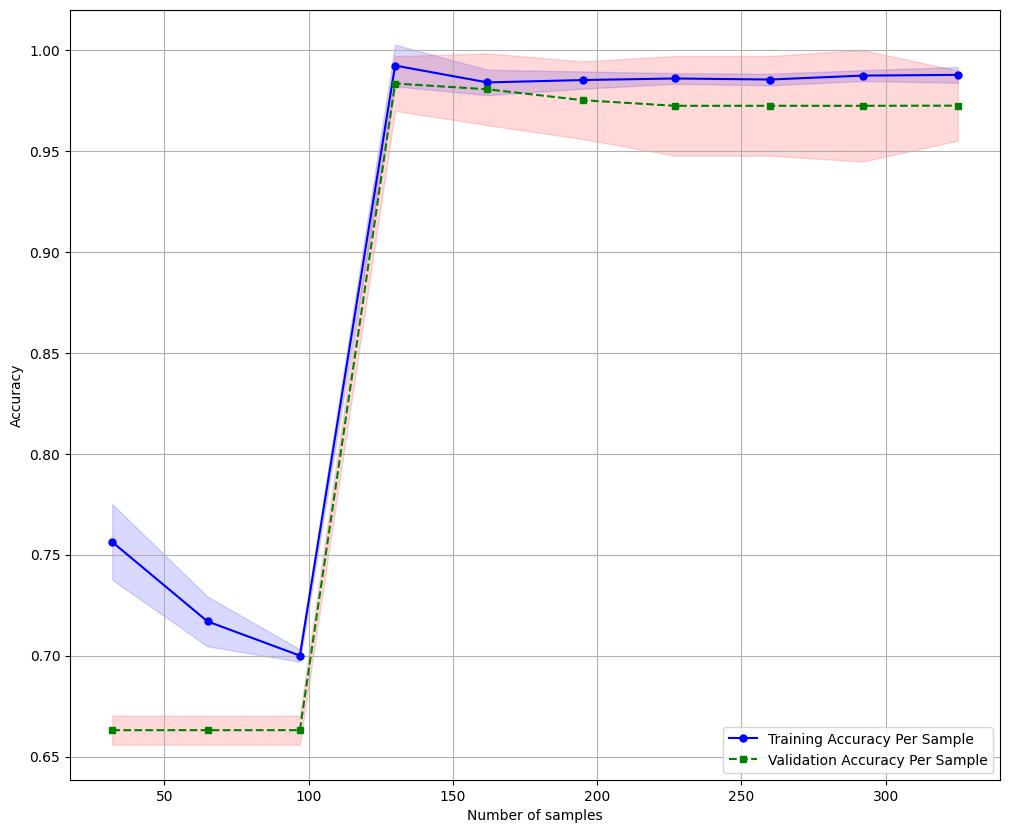

Confusion Matrix
[[ 50  14]
 [  2 105]]
Accuracy: 0.9064, Precision: 0.8824, Recall: 0.9813, F1: 0.9292, AUC: 0.8441


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'm', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('lgbm', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)